In [2]:
import sklearn.datasets
import sklearn
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.
1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [3]:
covtype = sklearn.datasets.fetch_covtype()

df = pd.DataFrame( data = np.c_[covtype['data'], covtype['target']],
                      columns = covtype['feature_names'] + ['target'] )

df.target = df.target.astype( int )

df.head(15)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

In [ ]:
df_X = df.drop(columns=['target'])
df_y = df['target']

scaled_X = StandardScaler().fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, df_y, test_size=0.25, random_state=42)

clf = KNeighborsClassifier()
# clf.fit(X_train, y_train)

1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [4]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

KNeighbors = KNeighborsClassifier()
list_n_estimators = [2, 3, 5]

tuned_parameters = [{"n_neighbors": list_n_estimators}]
n_folds = 3

clf = GridSearchCV(KNeighbors, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)

# data_y_pred = clf.predict(X_test)
# print(accuracy_score(y_test, data_y_pred))

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 5]}], refit=False)

In [5]:
clf.best_params_

{'n_neighbors': 3}

In [6]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print(accuracy_score(y_test, data_y_pred))

0.967511858619099


2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [ ]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print(accuracy_score(y_test, data_y_pred))

0.9366278149160431


2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [7]:
DecisionTree = DecisionTreeClassifier()
list_max_depth = [2, 3, 5]
list_max_features = ['auto', 'sqrt', 'log2']

tuned_parameters = [{"max_depth": list_max_depth, 'max_features': list_max_features}]
n_folds = 5

clf = GridSearchCV(DecisionTree, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 5],
                          'max_features': ['auto', 'sqrt', 'log2']}],
             refit=False)

In [8]:
clf.best_params_

{'max_depth': 5, 'max_features': 'sqrt'}

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

In [43]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, max_features='sqrt')
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)
print(accuracy_score(y_test, data_y_pred))

0.5445808348192465


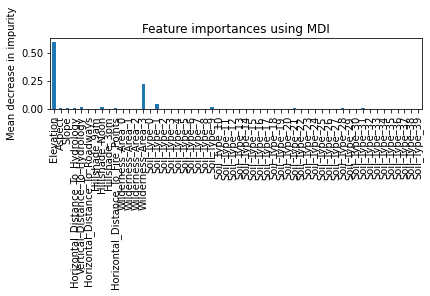

In [14]:
importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.classes_], axis=0)

forest_importances = pd.Series(importances, index=df_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [41]:
sorted(forest_importances, reverse=True)[:3]

[0.6019790080677339, 0.2233965926251227, 0.04783116995114906]

In [32]:
forest_importances


Elevation                             0.601979
Aspect                                0.012750
Slope                                 0.003980
Horizontal_Distance_To_Hydrology      0.004809
Vertical_Distance_To_Hydrology        0.016589
Horizontal_Distance_To_Roadways       0.003510
Hillshade_9am                         0.000945
Hillshade_Noon                        0.018733
Hillshade_3pm                         0.002012
Horizontal_Distance_To_Fire_Points    0.009033
Wilderness_Area_0                     0.000000
Wilderness_Area_1                     0.000000
Wilderness_Area_2                     0.000000
Wilderness_Area_3                     0.223397
Soil_Type_0                           0.000000
Soil_Type_1                           0.047831
Soil_Type_2                           0.000000
Soil_Type_3                           0.000000
Soil_Type_4                           0.000000
Soil_Type_5                           0.000000
Soil_Type_6                           0.000000
Soil_Type_7  

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [ ]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print(accuracy_score(y_test, data_y_pred))

0.952964826888257


3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


In [ ]:
RandomForest = RandomForestClassifier()
list_n_estimators = [100, 150, 200, 250]

tuned_parameters = [{"n_estimators": list_n_estimators}]
n_folds = 5

clf = GridSearchCV(RandomForest, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [100, 150, 200, 250]}], refit=False)

In [ ]:
clf.best_params_

{'n_estimators': 250}

In [5]:
df_X = df.drop(columns=['target'])
df_y = df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(n_estimators=250)
clf.fit(X_train, y_train)

data_y_pred = clf.predict(X_test)

print(accuracy_score(y_test, data_y_pred))

0.954562040026712


Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [ ]:
#RandomForestClassifier с подобранными параметрами n_estimators = 250